# Reduce 90% by 2040

*Goal*: Can we calculate what percentage we would have to reduce the January emissions proposal to reduce emissions from large buildings by 90% by 2040?

*Method*: Implement a binary search tree algorithm and calculate emissions in 2040 based on percent reduction of proposed emissions timeline. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
import os
import shutil

In [2]:
from baseline_model import BaselineBEPSModel

In [20]:
JAN_TIMELINE_PATH = '../data/input_data/scen_1_reformatted.csv'
BUILDING_DATA_PATH = '../data/input_data/building_data_recleaned_8_3.csv'

FINES_YEARS = [2030, 2035, 2040, 2045, 2050]
FINE_PER_SQFT = 2.5

EMISSIONS_PATH = '../data/input_data/energy_emissions.csv'

In [4]:
jan_timeline = pd.read_csv(JAN_TIMELINE_PATH)
jan_timeline.head()

,Unnamed: 0,year,building_type,sq_ft,sq_ft_classification,ghgi,max_size,min_size
0,0,2027,College/University,>220K Buildings,A,2.83,1000000,220000
1,1,2027,College/University,>90-220K Buildings,B,2.83,220000,90000
2,2,2027,College/University,>50-90K Buildings,C,NaN,90000,50000
3,3,2027,College/University,>30-50K Buildings,D,NaN,50000,30000
4,4,2027,College/University,>20-30K Buildings,E,NaN,50000,20000


In [9]:
JAN_BASELINE_MODEL_PATH = 'jan_baseline_8_3.csv'
jan_baseline = pd.read_csv(JAN_BASELINE_MODEL_PATH)

# emissions in 2026 will be the same as emissions in 2027 w/o improvements to infrastructure
JAN_BASELINE_2026_EMISSIONS_KG = jan_baseline[jan_baseline['year'] == 2027]['expected_baseline'].sum()
JAN_BASELINE_2026_EMISSIONS_KG

459452209.8585

In [11]:
# calculate 90% reduction level for 2040

TARGET_FOR_2040_KG = JAN_BASELINE_2026_EMISSIONS_KG * 0.1
TARGET_FOR_2040_KG

45945220.98585001

In [44]:
# method to create temporary file for emissions
# percent is % of original baseline, not percent reduction of original baseline
def create_temp_emissions_timeline_file(percent, timeline_path):
    timeline = pd.read_csv(timeline_path)
    timeline['ghgi'] = timeline['ghgi'] * (percent/100.0)
    file_name = f'tmp/timeline_{percent}_percent_of_policy.csv'
    timeline.to_csv(file_name)
    return file_name

In [45]:
def find_reduction_percent(target_kg, target_year, timeline_path, emissions_path, building_data_path, fine_years, fine_per_sqft):
    # make temporary directory for timeline files
    os.mkdir('tmp')

    min_emissions = target_kg - 5000
    max_emissions = target_kg + 5000

    high = 100
    low = 0
    found_target = False

    while not found_target:
        percent_of_orig_emissions = (high + low) / 2
        reduced_timeline_path = create_temp_emissions_timeline_file(percent_of_orig_emissions, timeline_path)

        model = BaselineBEPSModel(emissions_path, reduced_timeline_path, building_data_path, fine_years, fine_per_sqft)
        model.calculate_baseline_model(target_year, target_year)
        emissions_in_2040 = model.scenario_results['compliant_emissions'].sum()

        if min_emissions < emissions_in_2040 < max_emissions:
            print(f'You can achieve {target_kg} kg/yr in {target_year} by reducing the baselines by {100 - percent_of_orig_emissions}%.')
            # move file
            os.rename(reduced_timeline_path, reduced_timeline_path.replace('tmp/', ''))
                      
            # turn model into csv
            model.scenario_results.to_csv(f'emissions_{target_year}_{percent_of_orig_emissions}_of_policy.csv')

            # delete tmp directory
            shutil.rmtree('tmp')

            found_target = True

        else:
            if emissions_in_2040 < target_kg:
                low = percent_of_orig_emissions
            else:
                high = percent_of_orig_emissions

In [37]:
find_reduction_percent(TARGET_FOR_2040_KG, 2040, JAN_TIMELINE_PATH, EMISSIONS_PATH, BUILDING_DATA_PATH, FINES_YEARS, FINE_PER_SQFT)

/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results
You can achieve 45945220.98585001 kg/yr in 2040 by reducing the baselines by 68.2373046875%.


In [31]:
# see what 80% would look like
find_reduction_percent(JAN_BASELINE_2026_EMISSIONS_KG*0.2, 2040, JAN_TIMELINE_PATH, EMISSIONS_PATH, BUILDING_DATA_PATH, FINES_YEARS, FINE_PER_SQFT)

/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results
You can achieve 91890441.97170001 kg/yr in 2040 by reducing the baselines by 27.64892578125%.


## 90% Reduction with June timeline

Same as above, but calculate % reduction in June timeline instead of January.

In [35]:
JUNE_TIMELINE_PATH = '../data/input_data/scen_2_reformatted_8_3.csv'

In [46]:
find_reduction_percent(TARGET_FOR_2040_KG, 2040, JUNE_TIMELINE_PATH, EMISSIONS_PATH, BUILDING_DATA_PATH, FINES_YEARS, FINE_PER_SQFT)

/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results
You can achieve 45945220.98585001 kg/yr in 2040 by reducing the baselines by 79.443359375%.


## Mixing and matching goals for large/small buildings

Let's try letting the small buildings use the regular January plan and the big buildings use a more aggressive timeline.

Model:

- Buildings over 50k use an extremely reduced benchmark 
- Buildings under 50k use a slightly reduced benchmark

In [49]:
# How much emissions are produced by large buildings vs small buildings?

building_data = pd.read_csv(BUILDING_DATA_PATH)
small_buildings = building_data[building_data['sq_ft_classification'].isin(['D', 'E', 'F'])]
large_buildings = building_data[building_data['sq_ft_classification'].isin(['A', 'B', 'C'])]

In [63]:
small_buildings.to_csv('small_buildings_data.csv')
large_buildings.to_csv('large_buildings_data.csv')

In [54]:
jan_baseline.columns

Index(['Unnamed: 0', 'OSEBuildingID', 'BuildingName', 'Total_sqft',
       'sq_ft_classification', 'LargestPropertyUseType OSE',
       'SecondLargestPropertyUseType OSE', 'ThirdLargestPropertyUseType OSE',
       'year', 'expected_baseline', 'expected_baseline_ghgi',
       'city_ghgi_target', 'compliant_ghgi', 'compliant_emissions',
       'compliance_status', 'compliance_fees'],
      dtype='object')

In [60]:
percent_large_building_emissions = jan_baseline[(jan_baseline['sq_ft_classification'].isin(['A', 'B', 'C'])) & (jan_baseline['year'] == 2027)]['expected_baseline'].sum() / JAN_BASELINE_2026_EMISSIONS_KG
percent_small_building_emissions = jan_baseline[(jan_baseline['sq_ft_classification'].isin(['D', 'E', 'F'])) & (jan_baseline['year'] == 2027)]['expected_baseline'].sum() / JAN_BASELINE_2026_EMISSIONS_KG

print(f'Right now {percent_large_building_emissions}% of our emissions comes from large buildings and {percent_small_building_emissions}% comes from small buildings.')

Right now 0.807834694320675% of our emissions comes from large buildings and 0.1921653056793249% comes from small buildings.


## Reduce small building emissions by 25%

In [62]:
# How much would the small buildings produce if you reduced by 25%?

os.mkdir('tmp')

buildings_25_percent_reduction_timeline = create_temp_emissions_timeline_file(75, JAN_TIMELINE_PATH)

In [64]:
small_buildings_25_percent_reduction = BaselineBEPSModel(EMISSIONS_PATH, 'tmp/timeline_75_percent_of_policy.csv', 'small_buildings_data.csv', FINES_YEARS, FINE_PER_SQFT)
small_buildings_25_percent_reduction.calculate_baseline_model(2040, 2040)

/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


In [65]:
emissions_small_buildings_25_percent_reduction_2040 = small_buildings_25_percent_reduction.scenario_results['compliant_emissions'].sum()
print(f'Large buildings could produce max {TARGET_FOR_2040_KG - emissions_small_buildings_25_percent_reduction_2040} kg in 2040.')

Large buildings could produce max 31200629.486800008 kg in 2040.


In [66]:
max_for_large_buildings = TARGET_FOR_2040_KG - emissions_small_buildings_25_percent_reduction_2040

In [72]:
emissions_small_buildings_25_percent_reduction_2040

14744591.499049999

In [68]:
find_reduction_percent(max_for_large_buildings, 2040, JAN_TIMELINE_PATH, EMISSIONS_PATH, 'large_buildings_data.csv', FINES_YEARS, FINE_PER_SQFT)

/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results
You can achieve 31200629.486800008 kg/yr in 2040 by reducing the baselines by 75.0732421875%.


In [73]:
# do the small and large buildings add up to 10% of initial baseline?!
emissions_large_buildings_75_percent_reduction_2040 = pd.read_csv('emissions_2040_24.9267578125_of_policy.csv')['compliant_emissions'].sum()

print(emissions_small_buildings_25_percent_reduction_2040 + emissions_large_buildings_75_percent_reduction_2040)
print(TARGET_FOR_2040_KG)

45942767.10976966
45945220.98585001


In [75]:
# they do! Let's calculate the full models

# small buildings
small_buildings_25_percent_reduction.timeline_path = 'timeline_75_percent_of_policy.csv'
small_buildings_25_percent_reduction._load_timeline_data()
small_buildings_25_percent_reduction.calculate_baseline_model(2027, 2050)

/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)
/Users/ihc/programming/350_seattle/BPS/experiments/benc

Model calculations complete. Access the model dataframe as model_name.scenario_results


In [76]:
small_buildings_25_percent_reduction.scenario_results.to_csv('small_buildings_reduce_25_percent.csv')

In [78]:
# large buildings

large_buildings_75_percent_reduction = BaselineBEPSModel(EMISSIONS_PATH, 'timeline_24.9267578125_percent_of_policy.csv', 'large_buildings_data.csv', FINES_YEARS, FINE_PER_SQFT)
large_buildings_75_percent_reduction.calculate_baseline_model(2027, 2050)

/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)
/Users/ihc/programming/350_seattle/BPS/experiments/benc

Model calculations complete. Access the model dataframe as model_name.scenario_results


In [79]:
large_buildings_75_percent_reduction.scenario_results.to_csv('large_buildings_reduce_75_percent.csv')

In [83]:
combined_buildings = pd.concat([large_buildings_75_percent_reduction.scenario_results, small_buildings_25_percent_reduction.scenario_results])

In [86]:
combined_buildings.to_csv('combined_25_75_scenario_building_data.csv')

In [95]:
reduction_by_year = combined_buildings.groupby('year')['compliant_emissions'].sum()

In [96]:
reduction_by_year.head()

year
2027.0    2.635773e+08
2028.0    2.256779e+08
2029.0    2.047808e+08
2030.0    1.791734e+08
2031.0    1.515382e+08
Name: compliant_emissions, dtype: float64

In [98]:
reduction_by_year.to_csv('25-75_reduction_plan/year_by_year.csv')

<Axes: xlabel='year', ylabel='compliant_emissions'>

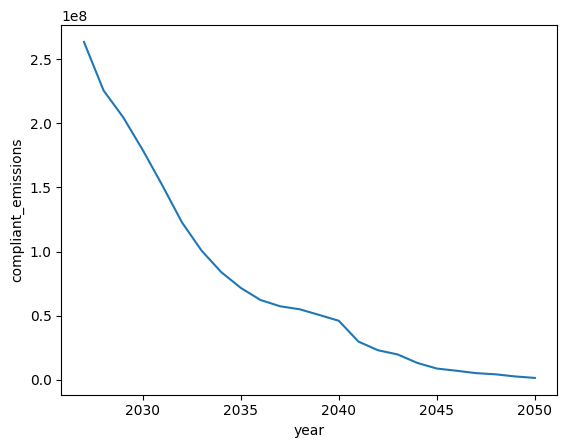

In [97]:
sns.lineplot(data=reduction_by_year)

## Reduce small buildings emissions by 40%

In [89]:
buildings_40_percent_reduction_timeline = create_temp_emissions_timeline_file(60, JAN_TIMELINE_PATH)

small_buildings_40_percent_reduction = BaselineBEPSModel(EMISSIONS_PATH, 'tmp/timeline_60_percent_of_policy.csv', 'small_buildings_data.csv', FINES_YEARS, FINE_PER_SQFT)
small_buildings_40_percent_reduction.calculate_baseline_model(2040, 2040)

/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


In [90]:
emissions_small_buildings_40_percent_reduction_2040 = small_buildings_40_percent_reduction.scenario_results['compliant_emissions'].sum()
print(f'Large buildings could produce max {TARGET_FOR_2040_KG - emissions_small_buildings_40_percent_reduction_2040} kg in 2040.')

Large buildings could produce max 33587417.23649001 kg in 2040.


In [91]:
max_for_large_buildings = TARGET_FOR_2040_KG - emissions_small_buildings_40_percent_reduction_2040

find_reduction_percent(max_for_large_buildings, 2040, JAN_TIMELINE_PATH, EMISSIONS_PATH, 'large_buildings_data.csv', FINES_YEARS, FINE_PER_SQFT)

/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results


/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['year'] = pd.Series([year]*len(temp_df))
/Users/ihc/programming/350_seattle/BPS/experiments/benchmarking_models/models/baseline_model.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['expected_baseline'] = input_df.apply(lambda building: self._get_expected_baseline(building, year), axis=1)


Model calculations complete. Access the model dataframe as model_name.scenario_results
You can achieve 33587417.23649001 kg/yr in 2040 by reducing the baselines by 72.83935546875%.


That doesn't seem worth it. Let's skip this possibility.